In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams['figure.figsize'] = (8.0, 4.0)

In [67]:
df= pd.read_csv('da.csv')
df.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [68]:
df.columns

Index(['Unnamed: 0', 'Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type',
       'Size'],
      dtype='object')

In [69]:
df.describe()

,Unnamed: 0,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,210784.500000,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,121696.920828,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,0.000000,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,105392.250000,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,210784.500000,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,316176.750000,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,421569.000000,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [70]:
df = df.drop(['IsHoliday_y','Unnamed: 0'],axis = 1)
df.rename(columns = {'IsHoliday_x':'IsHoliday'}, inplace = True)

In [71]:
df.Type.value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

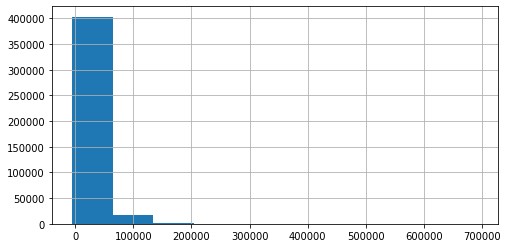

In [72]:
df.Weekly_Sales.hist()

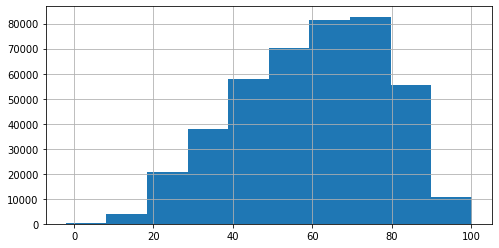

In [73]:
df.Temperature.hist()

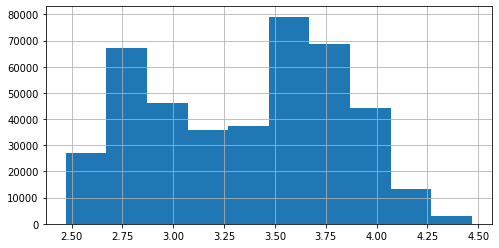

In [74]:
df.Fuel_Price.hist()

In [75]:
# add week of the year 
df['Date']= pd.to_datetime(df['Date'])
df['Week_number']=df.Date.dt.week
# add year column
df['Year']= df.Date.dt.year

In [76]:
# Sales by year 
df.groupby('Year')['Weekly_Sales'].sum()

Year
2010    2.288886e+09
2011    2.448200e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

In [77]:
# Sales by week number 
df.groupby('Week_number')['Weekly_Sales'].sum()

Week_number
1     8.773121e+07
2     8.269676e+07
3     8.273564e+07
4     7.943483e+07
5     1.419895e+08
6     1.456823e+08
7     1.471902e+08
8     1.338659e+08
9     1.407131e+08
10    1.380332e+08
11    1.367628e+08
12    1.320040e+08
13    1.391557e+08
14    1.467551e+08
15    1.367863e+08
16    1.384837e+08
17    1.309520e+08
18    1.424894e+08
19    1.377021e+08
20    1.359906e+08
21    1.409434e+08
22    1.472422e+08
23    1.451475e+08
24    1.434817e+08
25    1.401614e+08
26    1.430931e+08
27    1.470118e+08
28    1.378596e+08
29    1.362228e+08
30    1.324108e+08
31    1.437064e+08
32    1.401174e+08
33    1.413328e+08
34    1.407740e+08
35    1.397305e+08
36    1.407277e+08
37    1.311007e+08
38    1.284312e+08
39    1.281706e+08
40    1.398813e+08
41    1.336528e+08
42    1.340080e+08
43    1.350028e+08
44    9.443753e+07
45    9.459903e+07
46    9.156456e+07
47    1.324146e+08
48    9.929958e+07
49    1.112279e+08
50    1.219065e+08
51    1.579297e+08
52    8.647498e+07


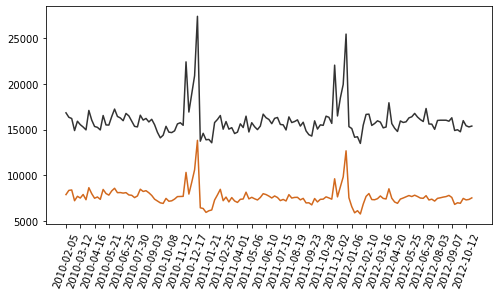

In [84]:
#Liner chart median & mean
median = df.groupby(['Date'])['Weekly_Sales'].median()
Date = df['Date'].unique()
avg = df.groupby(['Date'])['Weekly_Sales'].mean()

plt.plot( Date, avg ,color="#333333")
plt.plot( Date, median, color="chocolate")
plt.xticks(Date[::5],  rotation=70)
plt.show()

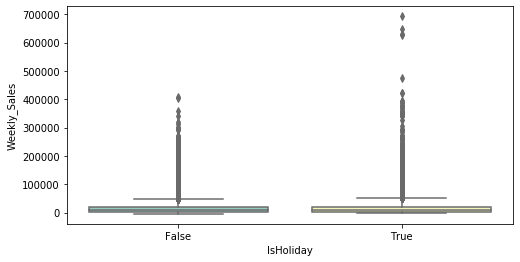

In [79]:
#  two boxplots (Sales during regular weeks, Sales during holidays’ weeks)

sns.boxplot(y='Weekly_Sales', x='IsHoliday', 
                 data=df,palette="Set3")
#plt.rcParams['figure.figsize'] = [12,16]
#plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower


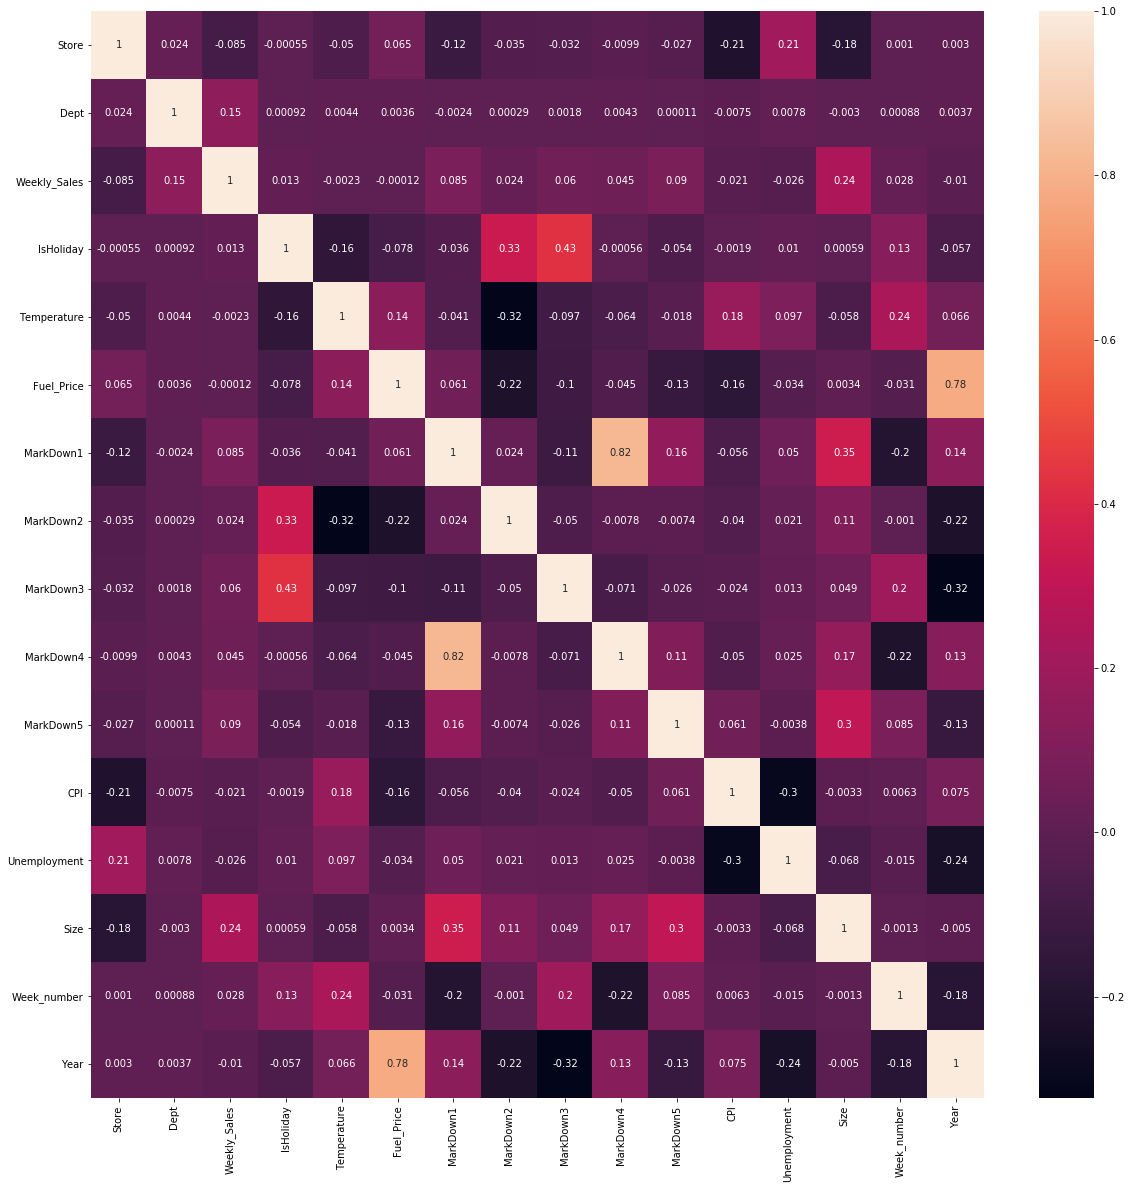

In [80]:
# correlation table 
cor = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True)



In [81]:
pd.pivot_table(df, index = ['Year','Week_number'], values = 'Weekly_Sales')

Weekly_Sales
Year Week_number              
2010 5            16836.121997
     6            16352.056032
     7            16216.658979
     8            14899.549688
     9            15921.015727
...                        ...
2012 39           14765.327279
     40           15983.413747
     41           15427.596739
     42           15295.732397
     43           15391.725681

[143 rows x 1 columns]

In [82]:
#add sample weight
df.groupby(['IsHoliday'])['Weekly_Sales'].mean()

IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64

In [83]:
# add sample weight if it's holiday = 5 if it's not = 1 
df['Sample_weight'] = df['IsHoliday'].apply(lambda x: 5 if x == True else 1)
